In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
data = pd.read_excel("wine.xlsx")


In [ ]:
data.heads()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,title,vintage,alcohol,category
0,Albania,Elegant red fruits and spice on the nose. Vibr...,NaN,91,NaN,Central hilly region,NaN,NaN,Kallmet,Mrizi i Zanave,Gêg Kallmet Superior,2019.0,14.0,Red
1,Albania,Spicy red apple nose with sour cherry and ston...,NaN,86,NaN,Central hilly region,NaN,NaN,Kallmet,Mrizi i Zanave,Roza Kallmet,2020.0,12.5,Rosé
2,Albania,This garnet-colored wine made from 100% Kallme...,NaN,88,20.0,MirditГ«,NaN,NaN,Kallmet,ArbГ«ri,ArbГ«ri 2011 Kallmet (MirditГ«),2011.0,13.9,Red
3,Albania,"Ripe fruity notes, black cherries, prunes, jui...",NaN,87,NaN,Western lowland,NaN,NaN,Kallmet,Mrizi I Zanave,Geg Kallmet Superior,2020.0,14.5,Red
4,Albania,"Rosehip, strawberry jam, some dark berries, an...",NaN,91,NaN,Western lowland,NaN,NaN,Kallmet-Sangiovese-Shesh I Zi,Mrizi I Zanave,Kuven,2020.0,13.5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400380,USA,"A savoury, aromatic style with raisin fruit on...",NaN,87,NaN,Washington State,NaN,NaN,Syrah,Tender Hope,Coral Syrah,2018.0,15.0,Red
400381,USA,"Deep, full and resonant, with blackcurrants an...",NaN,91,NaN,Washington State,NaN,NaN,Cabernet Sauvignon-Cabernet Franc-Petit Verdot,Woodward Canyon,Artist Series 26 Cabernet Sauvignon,2017.0,14.8,Red
400382,USA,"Rich and full, with fresh, lifted notes of liv...",NaN,91,NaN,Washington State,NaN,NaN,Cabernet Sauvignon-Petit Verdot-Malbec,Woodward Canyon,Old Vines Cabernet Sauvignon,2017.0,15.0,Red
400383,US-France,"Defies categorization, in more ways than one. ...",NaN,88,50.0,Santa Barbara County-Condrieu,NaN,NaN,Viognier,Deux C,Deux C 2002 Viognier (Santa Barbara County-Con...,2002.0,13.5,White


Check for missing values

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
country             1
description      1275
designation    175048
points              1
price           95713
province         4670
region_1        58991
region_2       236150
variety         31160
winery              1
title           23599
vintage        119056
alcohol        118499
category        79498
dtype: int64


замена отсутствующих значений в числовых столбцах медианой

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

удаление строк с отсутствующими значениями в категориальных столбцах

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

2. Удаление дубликатов

In [ ]:
data = data.drop_duplicates()

Преобразование числовых столбцов в соответствующий формат

In [ ]:
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Стандартизация категориальных данных

In [ ]:
for col in categorical_columns:
    data[col] = data[col].astype(str).str.strip().str.lower()

Создание переменной "цена/качество"

In [ ]:
if 'price' in data.columns and 'points' in data.columns:
    data['price'] = pd.to_numeric(data['price'], errors='coerce')
    data['points'] = pd.to_numeric(data['points'], errors='coerce')
    data['price_to_quality'] = data['points'] / data['price']

Описательная статистика для числовых переменных

In [ ]:
numerical_stats = data[['price', 'points', 'alcohol']].describe()
print("Описательная статистика:\n", numerical_stats)

Описательная статистика:
               price        points       alcohol
count  67021.000000  67021.000000  67021.000000
mean      39.344836     88.797944     14.156290
std       27.143862      3.222338      9.221019
min        4.000000     80.000000      4.000000
25%       23.000000     87.000000     13.800000
50%       34.000000     89.000000     14.200000
75%       48.000000     91.000000     14.500000
max      750.000000    100.000000   2016.000000


Распределение категориальных переменных

In [ ]:
categorical_distributions = {}
for col in categorical_columns:
    categorical_distributions[col] = data[col].value_counts()
    print(f"Распределение для {col}:\n", categorical_distributions[col])

Распределение для country:
 country
us    67021
Name: count, dtype: int64
Распределение для description:
 description
nose is appealing and complex, with smoke, coffee, game and herb elements. flavors of dried fruits, hints of chocolate, and fairly evident oak. moderate finish with toasty oak notes and medium tannins.                                                                                                                                                                                                                   2
tom meadowcroft's second label, thomas henry, is also sourcing from borden ranch in lodi, as is his slightly higher-priced, lower-alcohol riesling under the meadowcroft name. this one not as as fragrant at first, more austere, but fully inviting wih melon, honey and pear. thai food would be the perfect pairing.                                                                                                    2
extremely fruity and relatively light in body, this ex

Корреляционный анализ слов
Токенизация текстовых данных

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
if 'description' in data.columns:
    vectorizer = CountVectorizer(max_features=50, stop_words='english')
    word_matrix = vectorizer.fit_transform(data['description'].fillna(""))
    word_df = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out())

 Добавление частотных слов в общий датафрейм

In [ ]:
data = pd.concat([data.reset_index(drop=True), word_df], axis=1)

Корреляционный анализ с числовыми переменными (цена и рейтинг)

In [ ]:
corr_with_price_points = data[word_df.columns].corrwith(data['price']).to_frame(name='price').join(
        data[word_df.columns].corrwith(data['points']).to_frame(name='points')
    )


In [ ]:
print("Корреляции частотных слов с ценой и рейтингом:\n", corr_with_price_points)

Корреляции частотных слов с ценой и рейтингом:
                price    points
acidity    -0.034917  0.063574
apple      -0.090432 -0.006957
aromas     -0.038005  0.052097
bit        -0.025798 -0.089873
black       0.169072  0.203837
blackberry  0.097464  0.037442
blend      -0.007948  0.000049
bodied     -0.003708  0.018180
cabernet    0.158626  0.083832
cherries    0.037764  0.021236
cherry      0.095708  0.049368
chocolate   0.116600  0.069773
complex     0.075305  0.186423
crisp      -0.089991 -0.003429
dark        0.092073  0.116198
drink       0.070607  0.034904
dry        -0.109591 -0.096618
finish     -0.028757  0.017158
flavors    -0.089895 -0.053603
fresh      -0.036162  0.062764
fruit       0.012423  0.080104
good       -0.049262 -0.040170
light      -0.052753 -0.017015
like       -0.029788 -0.061519
nose        0.015533  0.095509
notes      -0.007353  0.016022
oak         0.122282  0.074561
palate      0.029484  0.125638
pepper      0.027223  0.076163
pinot       0.014081  

 Корреляционный анализ с разновидностями

In [ ]:
if 'variety' in data.columns:
        variety_corr = {}
        for word in word_df.columns:
            variety_corr[word] = data.groupby('variety')[word].mean()
        variety_corr_df = pd.DataFrame(variety_corr).T

In [ ]:
print("Корреляции частотных слов с разновидностями:\n", variety_corr_df)

Корреляции частотных слов с разновидностями:
 variety     abouriou  aglianico  albariг±o  aleatico  alicante bouschet  \
acidity          0.0   0.272727   0.362745       0.5           0.090909   
apple            0.0   0.000000   0.450980       0.0           0.000000   
aromas           0.0   0.545455   0.362745       0.5           0.090909   
bit              0.0   0.000000   0.058824       0.0           0.000000   
black            0.0   0.454545   0.000000       0.0           0.363636   
blackberry       0.0   0.272727   0.000000       0.5           0.000000   
blend            0.0   0.000000   0.000000       0.0           0.000000   
bodied           0.0   0.090909   0.107843       0.0           0.454545   
cabernet         0.0   0.000000   0.000000       0.0           0.181818   
cherries         0.0   0.000000   0.000000       0.0           0.272727   
cherry           0.0   0.090909   0.000000       0.0           0.272727   
chocolate        0.0   0.090909   0.000000       0.0  

Визуализация корреляцийТепловая карта для числовых корреляций

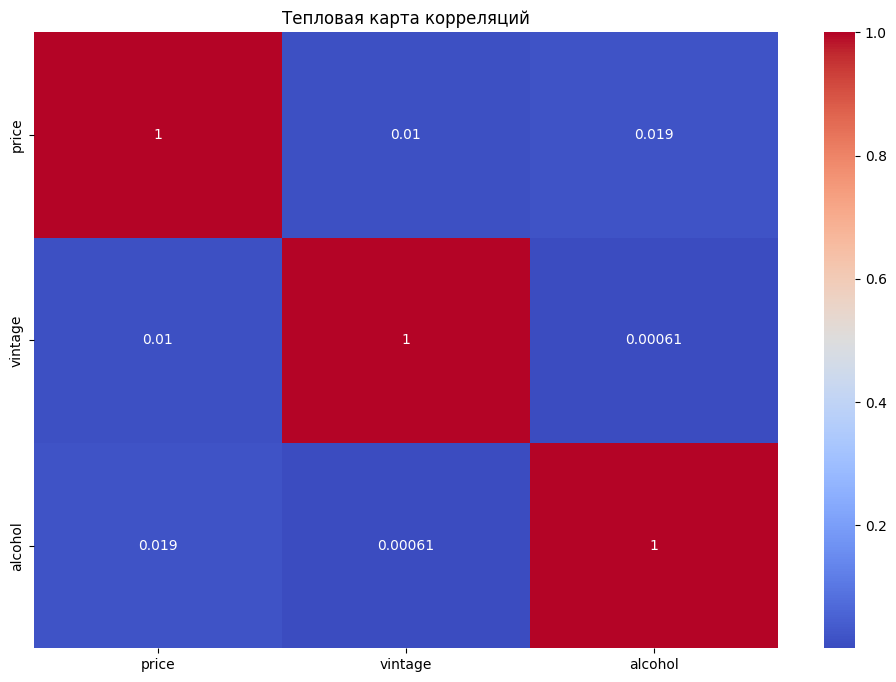

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Тепловая карта корреляций")
plt.show()

Диаграммы рассеяния для индивидуальных связей

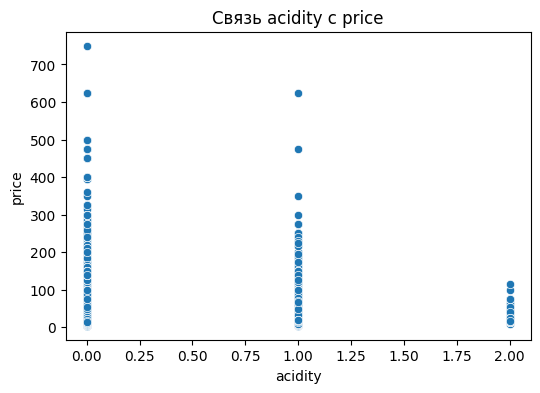

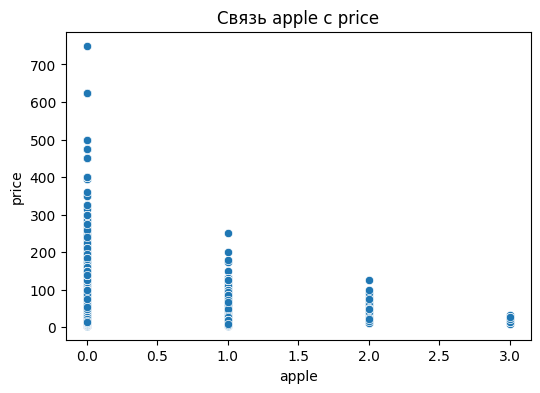

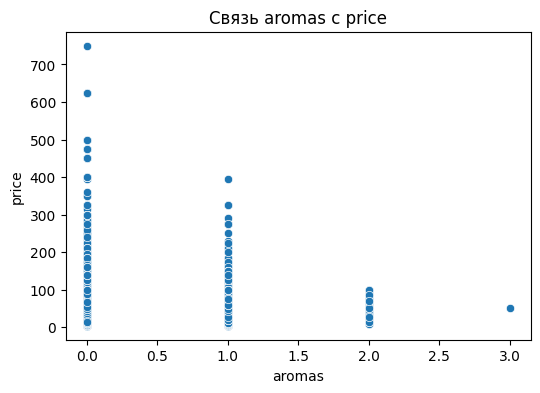

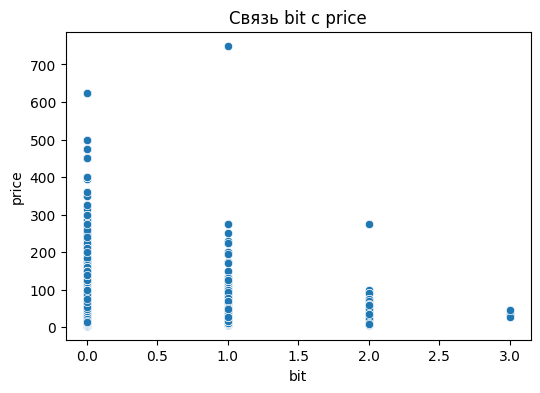

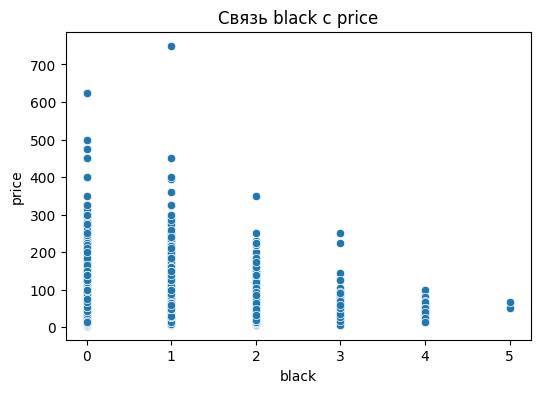

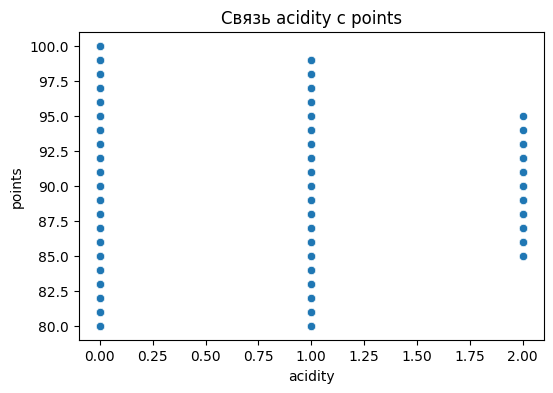

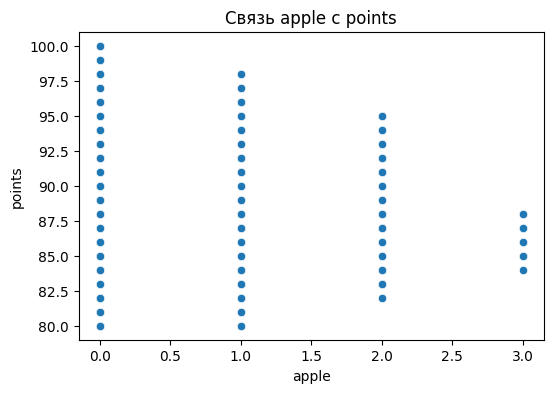

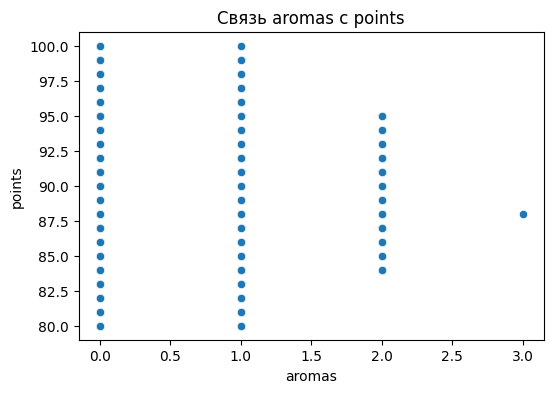

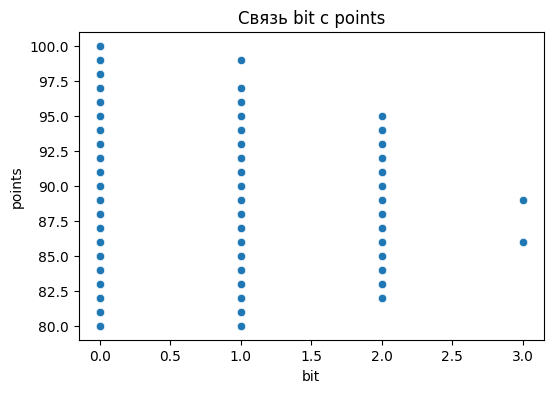

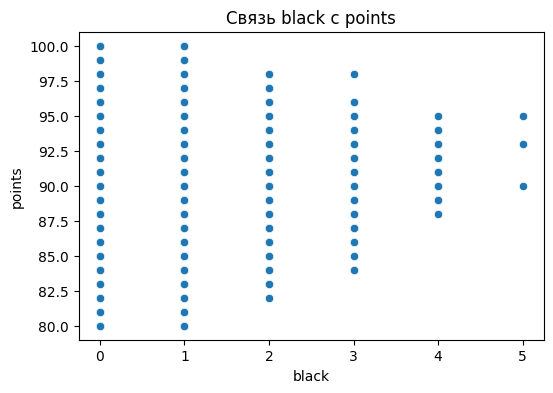

In [ ]:
for col in ['price', 'points']:
    if col in data.columns:
        for word in word_df.columns[:5]:  # Для примера визуализируем только первые 5 слов
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=data[word], y=data[col])
            plt.title(f"Связь {word} с {col}")
            plt.xlabel(word)
            plt.ylabel(col)
            plt.show()

Распределение оценок (баллов)

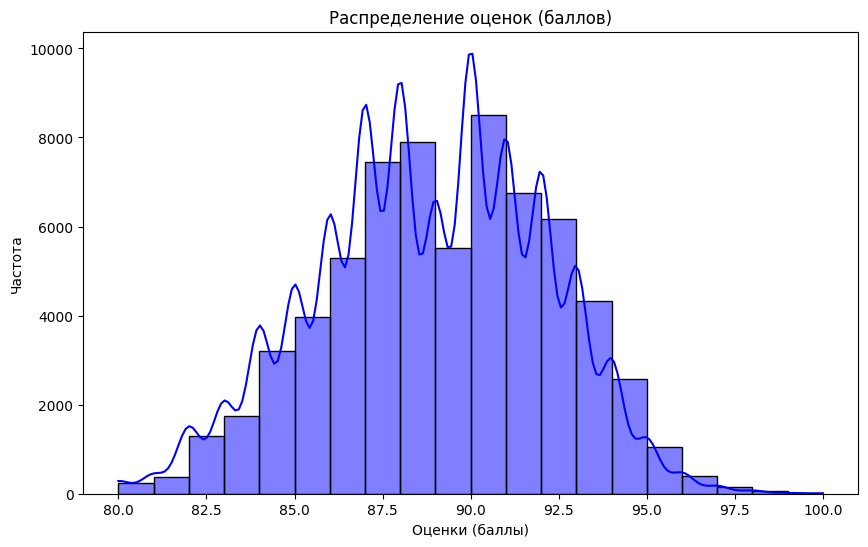

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['points'], kde=True, bins=20, color='blue')
plt.title("Распределение оценок (баллов)")
plt.xlabel("Оценки (баллы)")
plt.ylabel("Частота")
plt.show()

Средние цены по странам

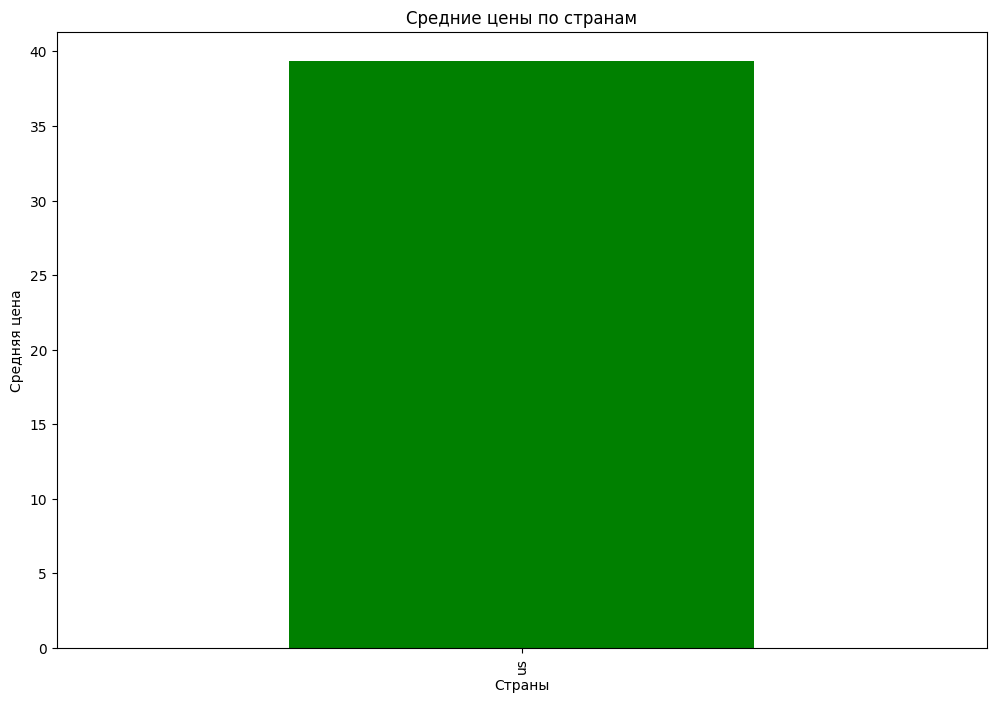

In [ ]:
if 'country' in data.columns and 'price' in data.columns:
    avg_price_by_country = data.groupby('country')['price'].mean().sort_values()
    avg_price_by_country.plot(kind='bar', figsize=(12, 8), color='green')
    plt.title("Средние цены по странам")
    plt.xlabel("Страны")
    plt.ylabel("Средняя цена")
    plt.xticks(rotation=90)
    plt.show()


Распределение вин по категориям и регионам

In [ ]:
if 'category' in data.columns and 'region' in data.columns:
    wine_counts = data.groupby(['category', 'region']).size().unstack(fill_value=0)
    wine_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title("Распределение вин по категориям и регионам")
    plt.xlabel("Категории")
    plt.ylabel("Количество вин")
    plt.xticks(rotation=45)
    plt.legend(title="Регионы")
    plt.show()

NameError: name 'data' is not defined

Интерактивная диаграмма рассеяния цена vs баллы

In [ ]:
if 'price' in data.columns and 'points' in data.columns and 'category' in data.columns:
    fig = px.scatter(
        data_frame=data,
        x='price',
        y='points',
        color='category',
        title="Зависимость между ценой и баллами",
        labels={"price": "Цена", "points": "Баллы"},
        hover_data=['country', 'region']
    )
    fig.show()

NameError: name 'px' is not defined